## Classifying Fashion-MNIST

In [7]:
import torch
from torchvision import datasets, transforms
import helper

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5,))]
)

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<AxesSubplot:>

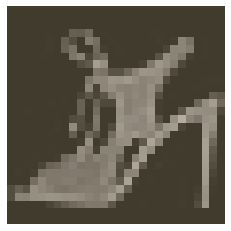

In [5]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

#### Build the network

In [14]:
from torch import nn, optim
import torch.nn.functional as F

In [21]:
# Define your network architecture here
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [22]:
# create the network, define the criterion and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [23]:
# Train the network
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5193380103754336
Training loss: 0.39545319636048537
Training loss: 0.36008286506318843
Training loss: 0.33369700302447336
Training loss: 0.3183575534045315
Training loss: 0.30567832718462323
Training loss: 0.2957195168666875
Training loss: 0.2820634905145621
Training loss: 0.2744969230439109
Training loss: 0.26811165834413664


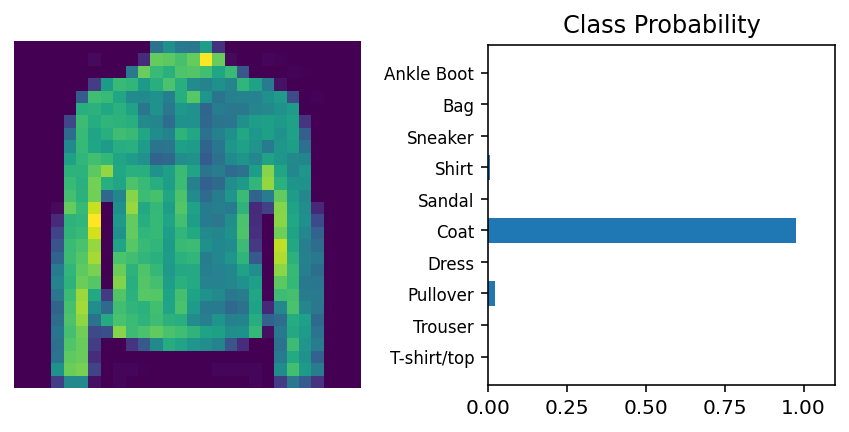

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# Calculate the class probabilities for img
ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')